<a href="https://colab.research.google.com/github/wakachii/SI-Org-chart/blob/main/Org_chart_Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install

In [ ]:
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-pok9zh4a
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-pok9zh4a
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.1 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp31

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import cv2 as cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
from PIL import ImageFont, ImageDraw, Image
import sys
import re
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

path = "/content/drive/MyDrive/learning"
path_train = path + "/data/train"
path_test = path + "/data/test"
path_coco = path + "/Org_chart-1.json"

register_coco_instances("org_chart", {}, path_coco, path_train)

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("org_chart",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.0004
cfg.SOLVER.MAX_ITER = (
    500
)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/05 06:33:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 131MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[10/05 06:33:47 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/05 06:34:02 d2.utils.events]:  eta: 0:01:42  iter: 19  total_loss: 5.521  loss_cls: 0.6805  loss_box_reg: 0.6918  loss_mask: 0.6839  loss_rpn_cls: 3.053  loss_rpn_loc: 0.2641    time: 0.2194  last_time: 0.2068  data_time: 0.1087  last_data_time: 0.0028   lr: 1.5585e-05  max_mem: 1468M
[10/05 06:34:11 d2.utils.events]:  eta: 0:01:46  iter: 39  total_loss: 2.416  loss_cls: 0.586  loss_box_reg: 0.8318  loss_mask: 0.6215  loss_rpn_cls: 0.1602  loss_rpn_loc: 0.2175    time: 0.2504  last_time: 0.2320  data_time: 0.0121  last_data_time: 0.0029   lr: 3.1569e-05  max_mem: 1526M
[10/05 06:34:15 d2.utils.events]:  eta: 0:01:35  iter: 59  total_loss: 2.144  loss_cls: 0.5447  loss_box_reg: 0.8142  loss_mask: 0.4913  loss_rpn_cls: 0.05299  loss_rpn_loc: 0.2092    time: 0.2326  last_time: 0.2407  data_time: 0.0032  last_data_time: 0.0027   lr: 4.7553e-05  max_mem: 1526M
[10/05 06:34:19 d2.utils.events]:  eta: 0:01:30  iter: 79  total_loss: 1.955  loss_cls: 0.5024  loss_box_reg: 0.804  loss_mask: 

[10/05 06:36:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


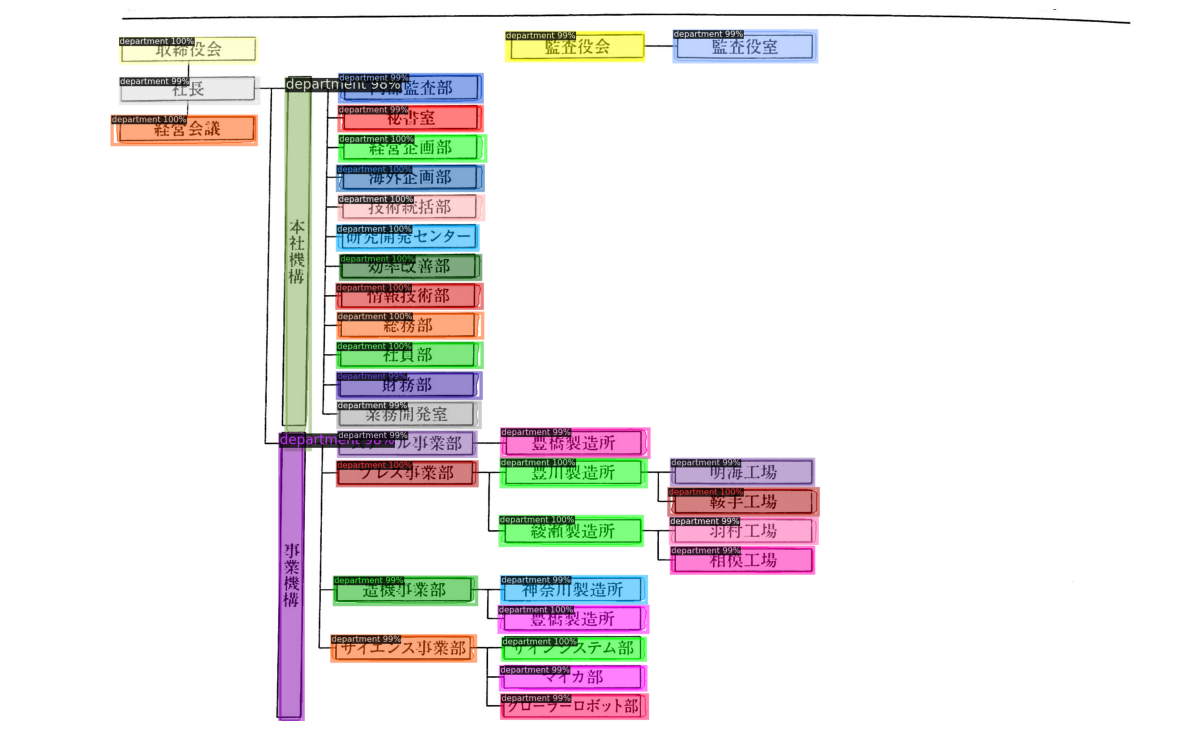

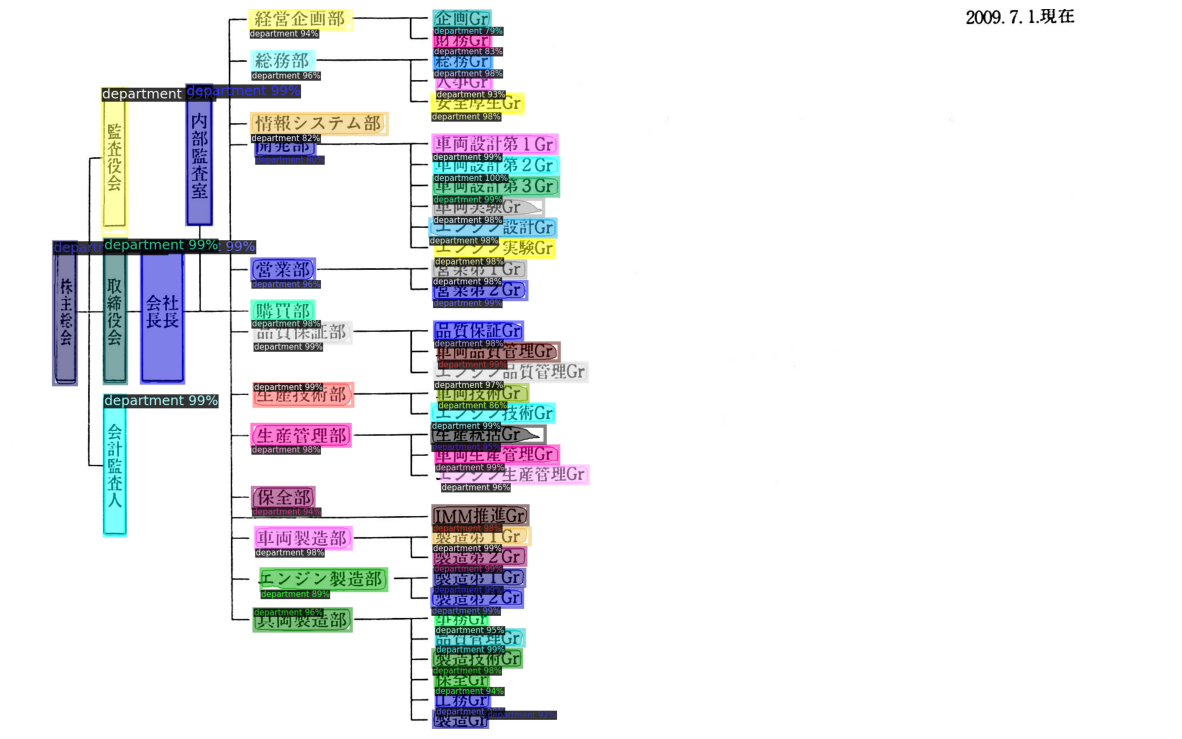

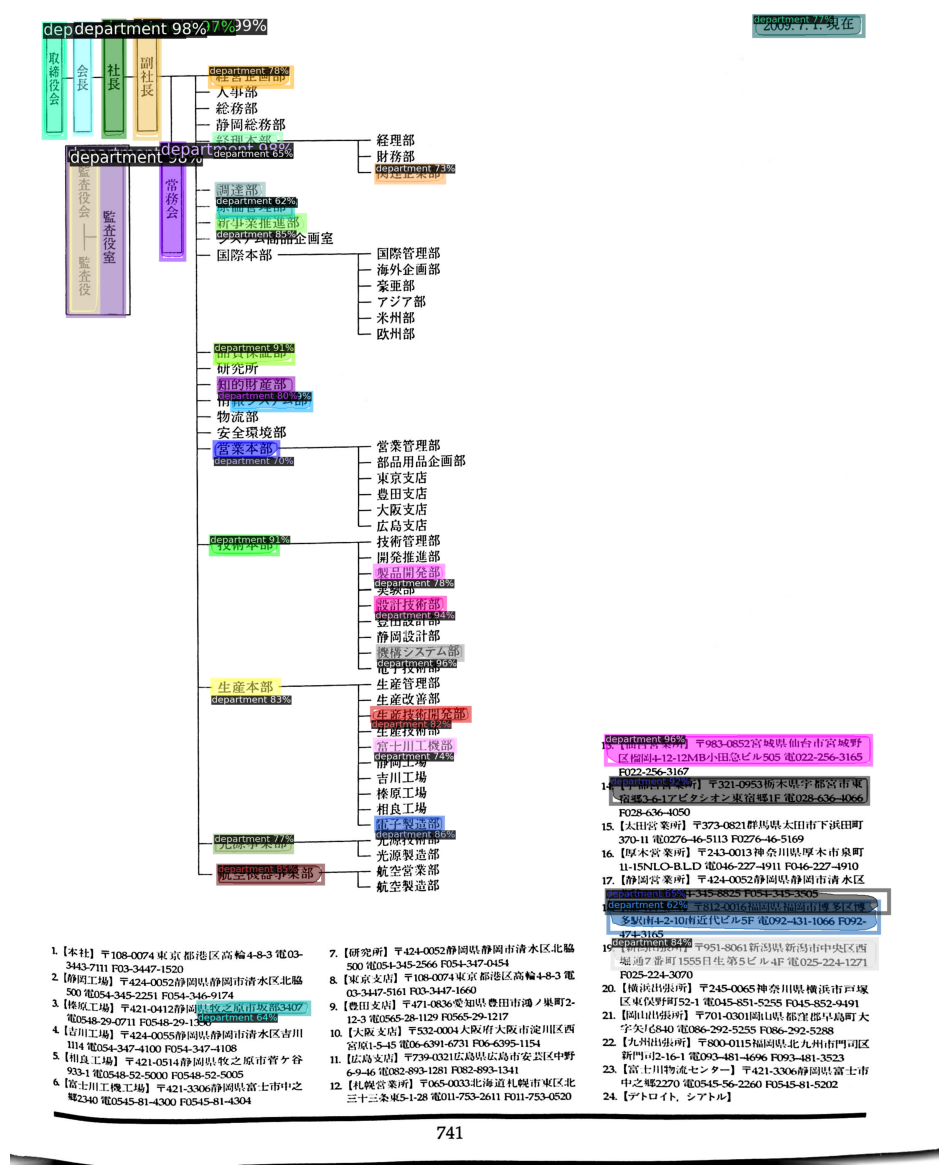

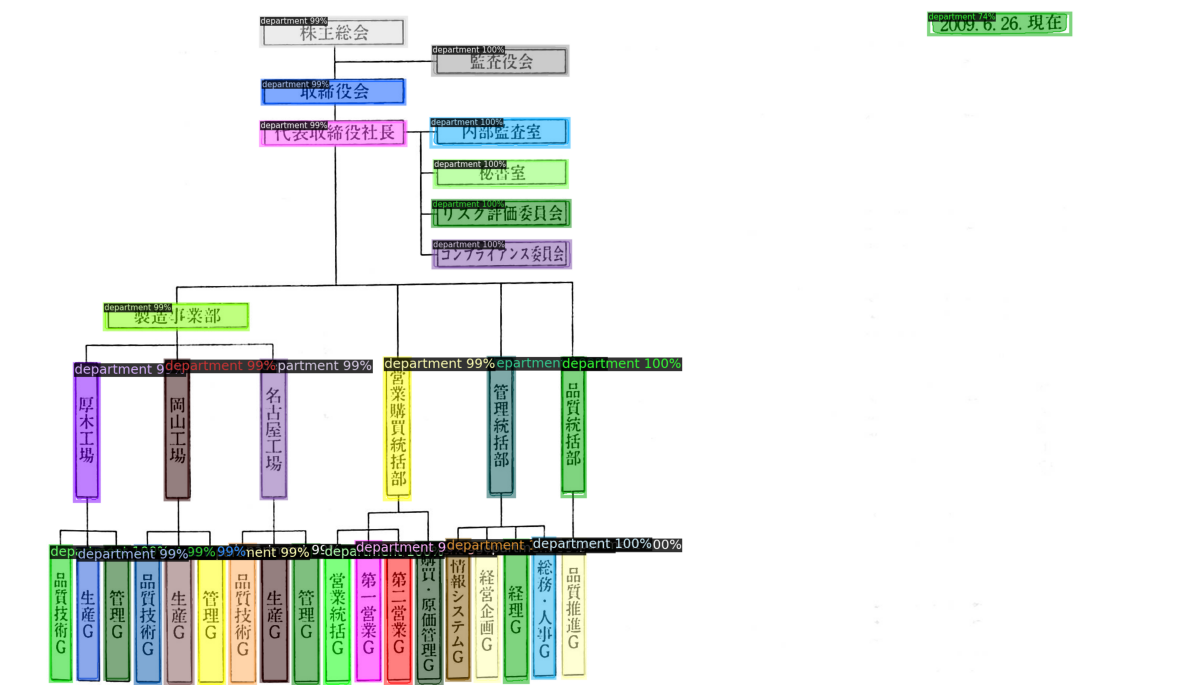

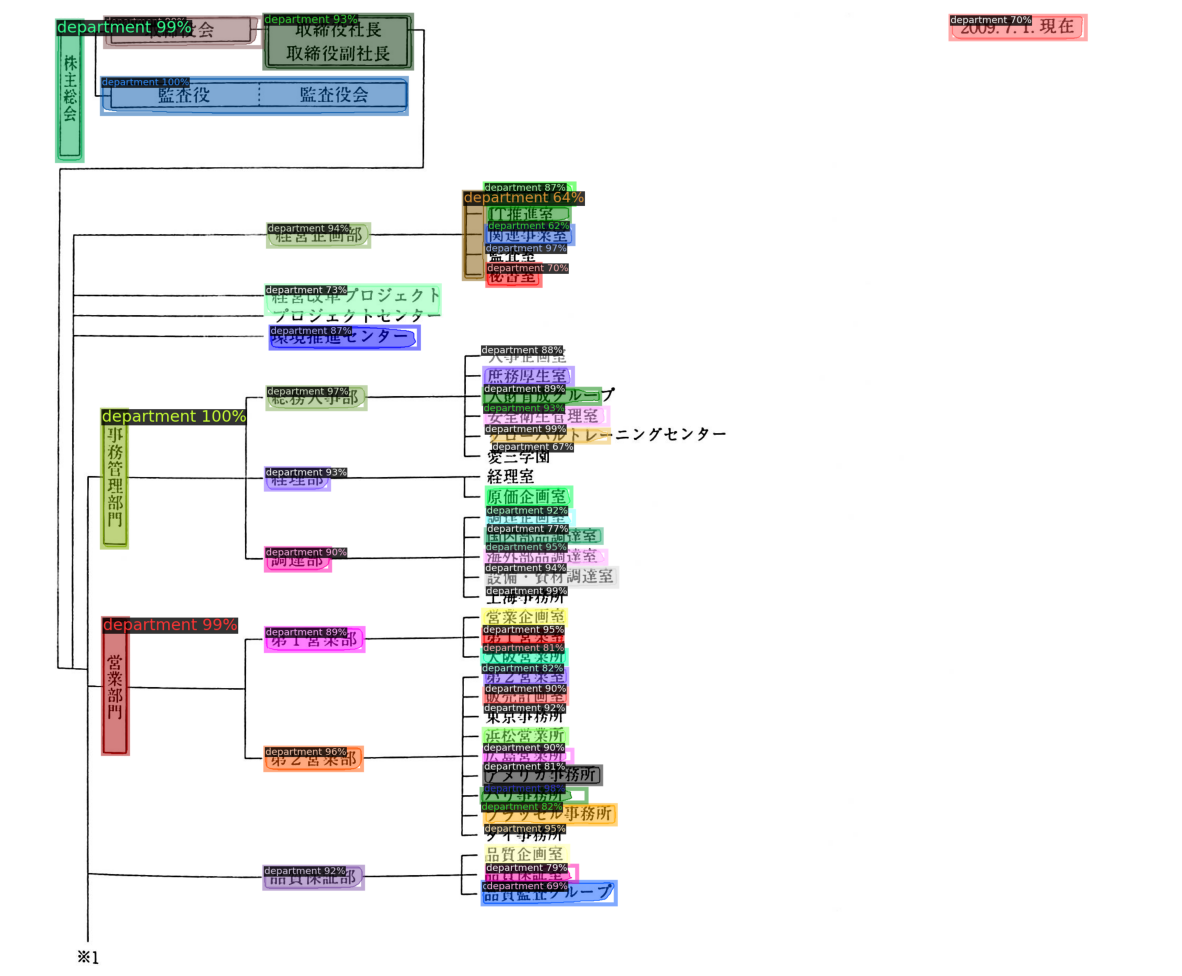

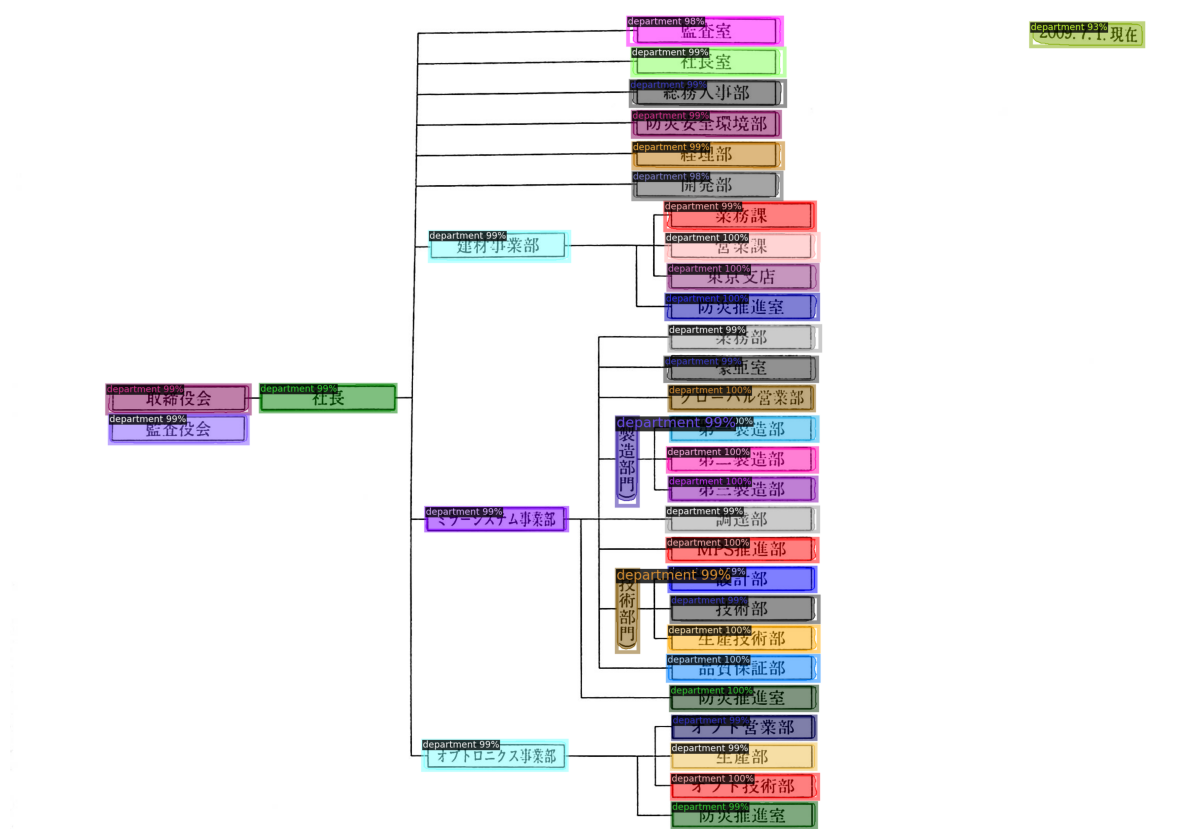

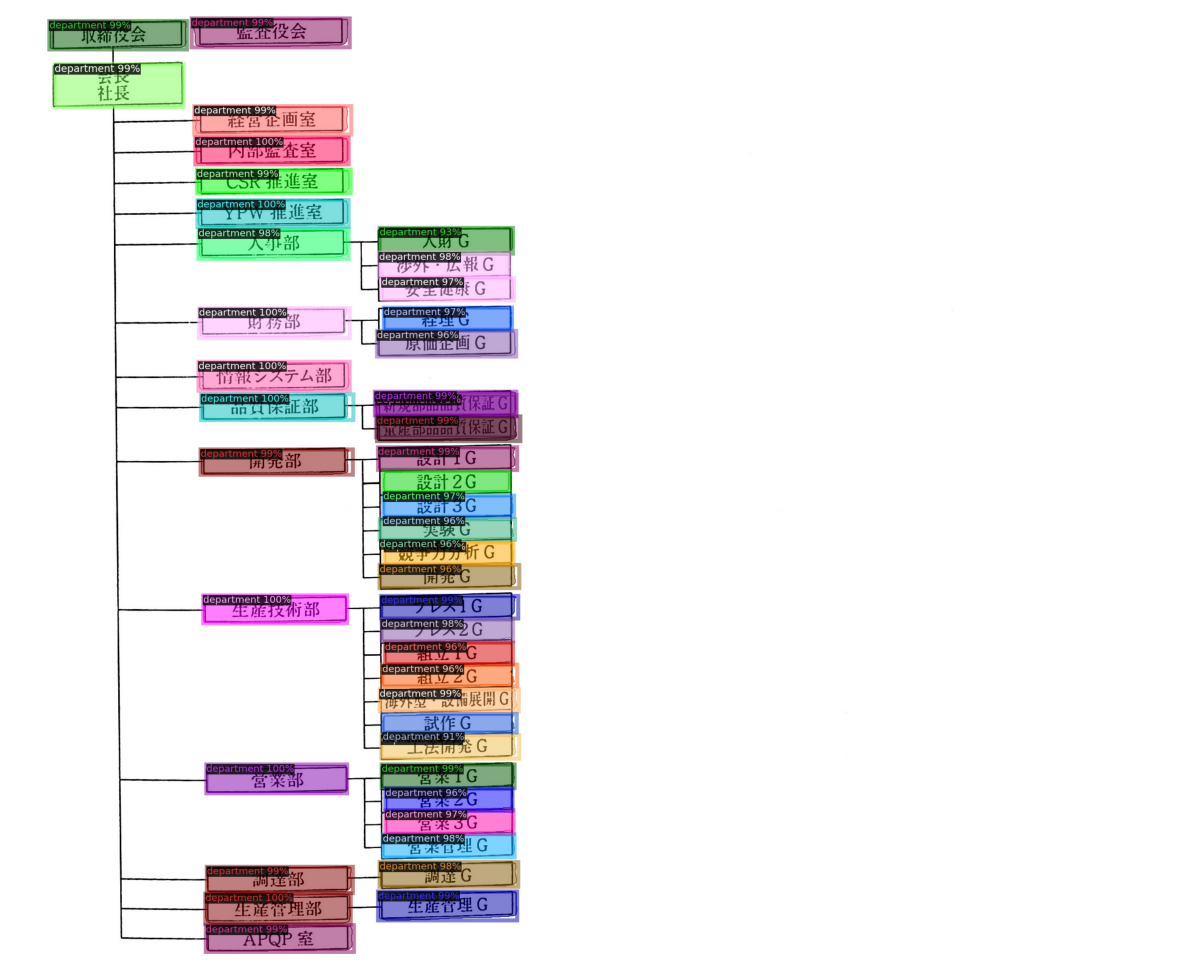

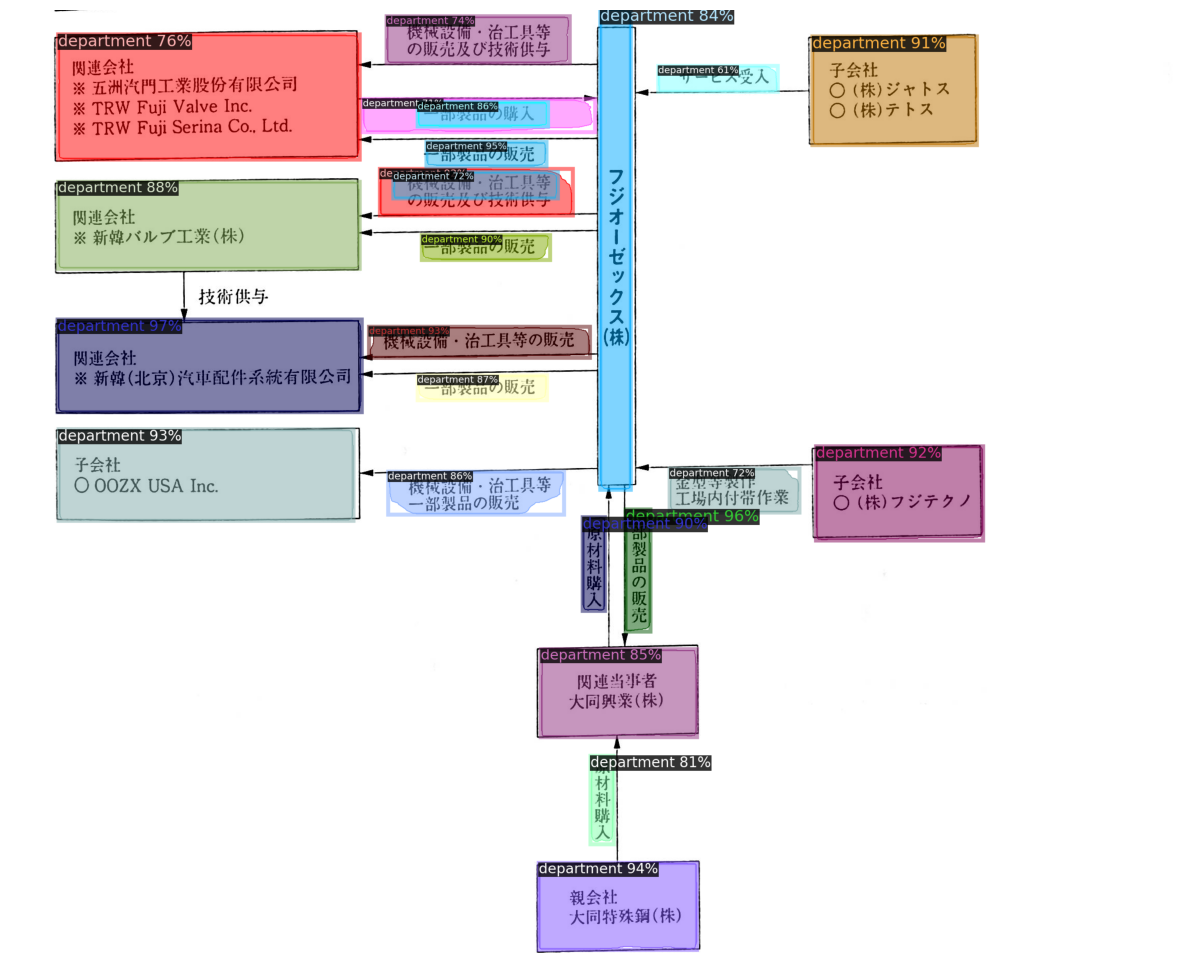

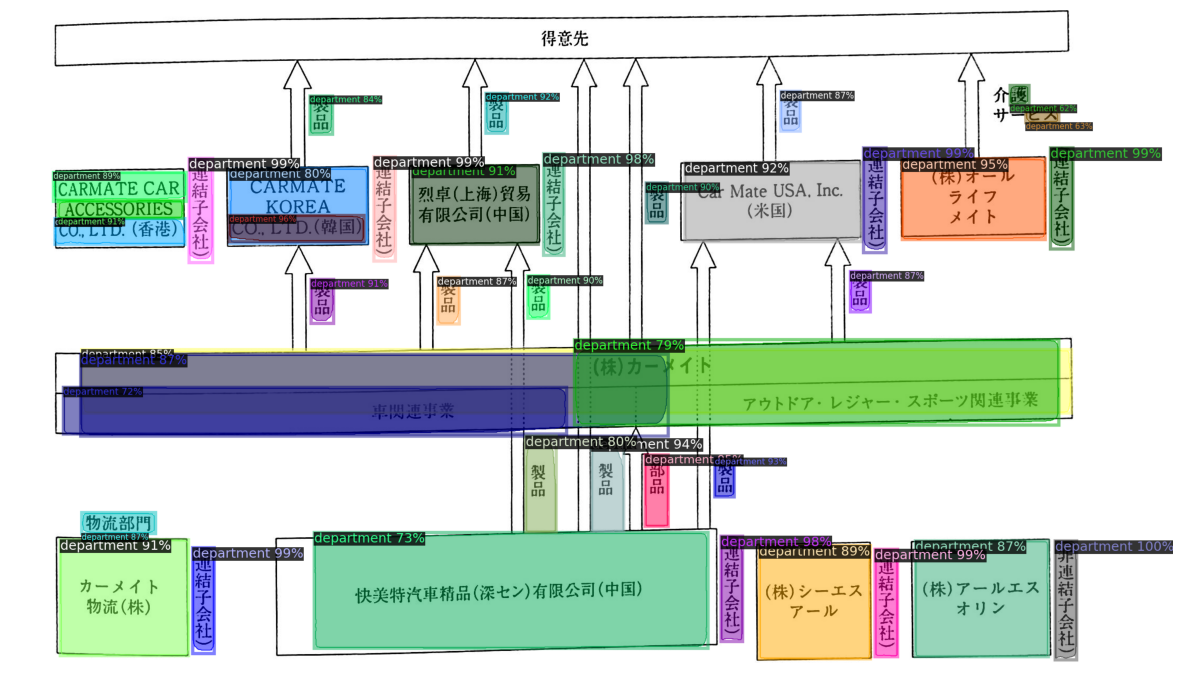

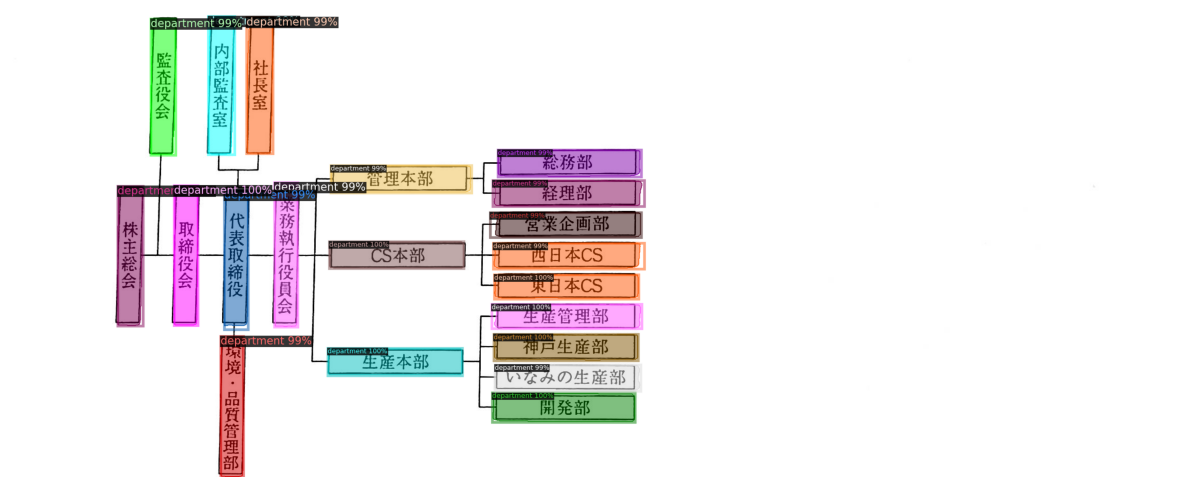

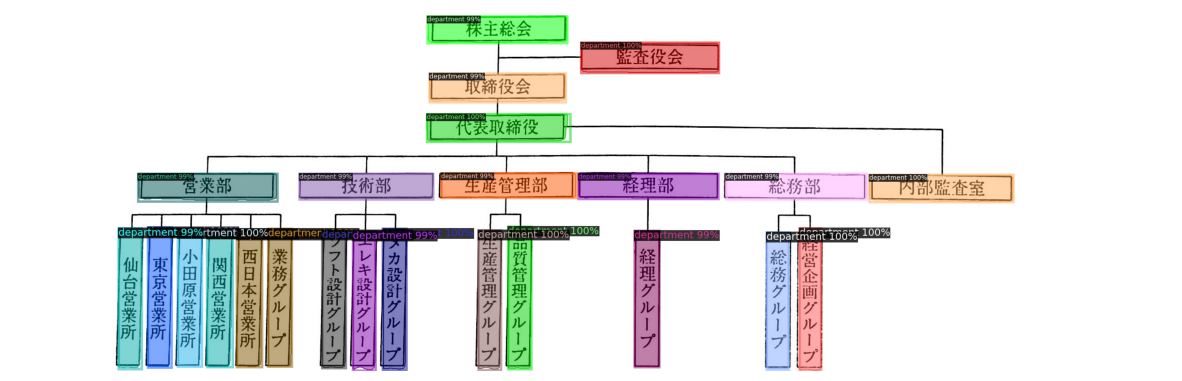

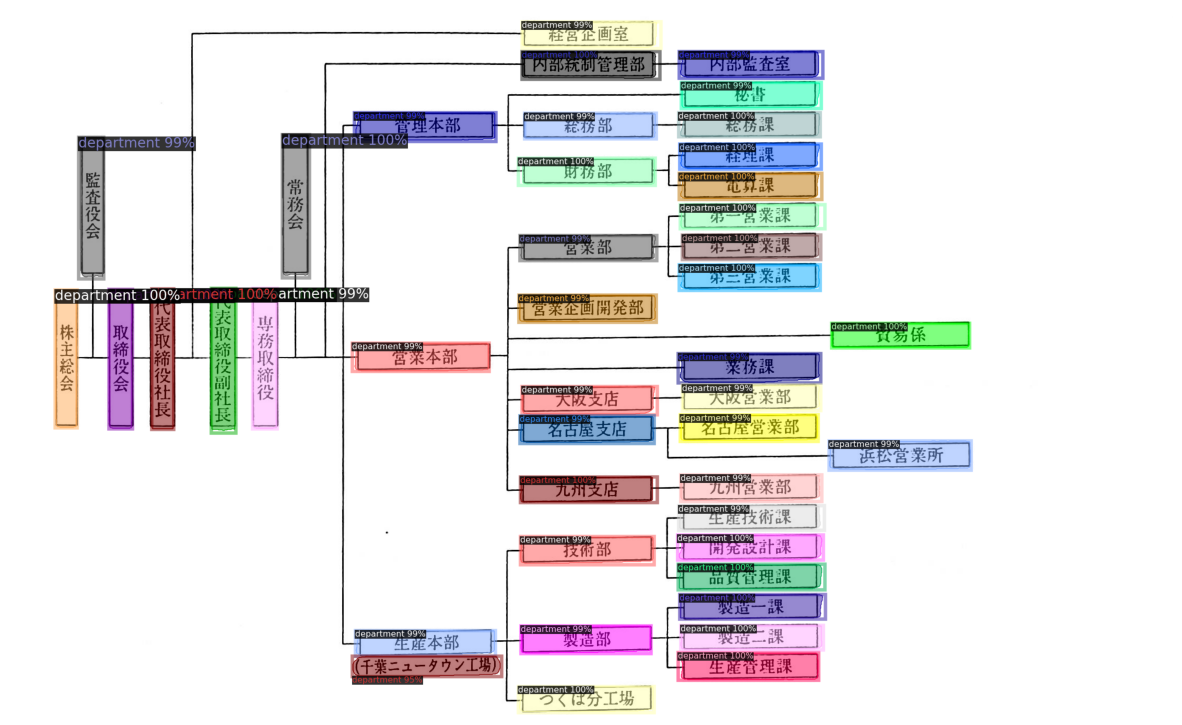

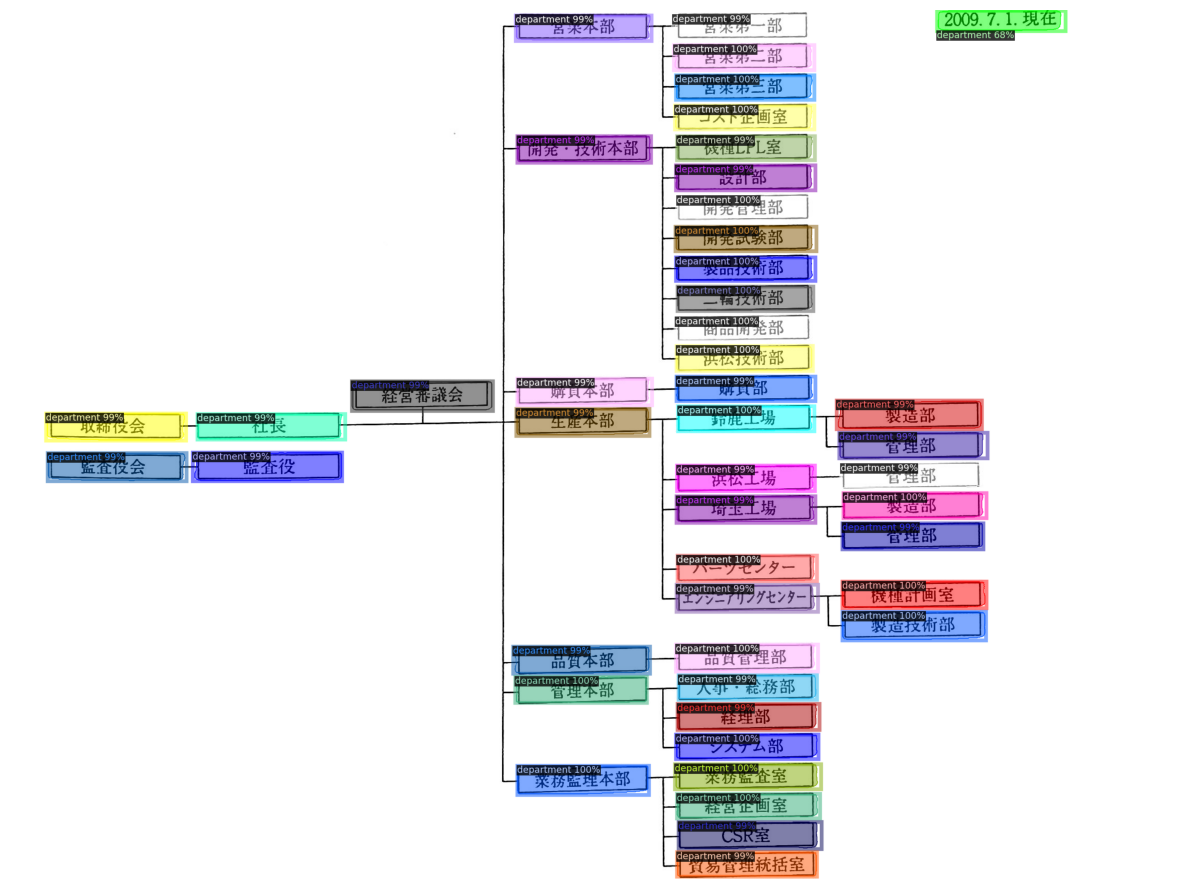

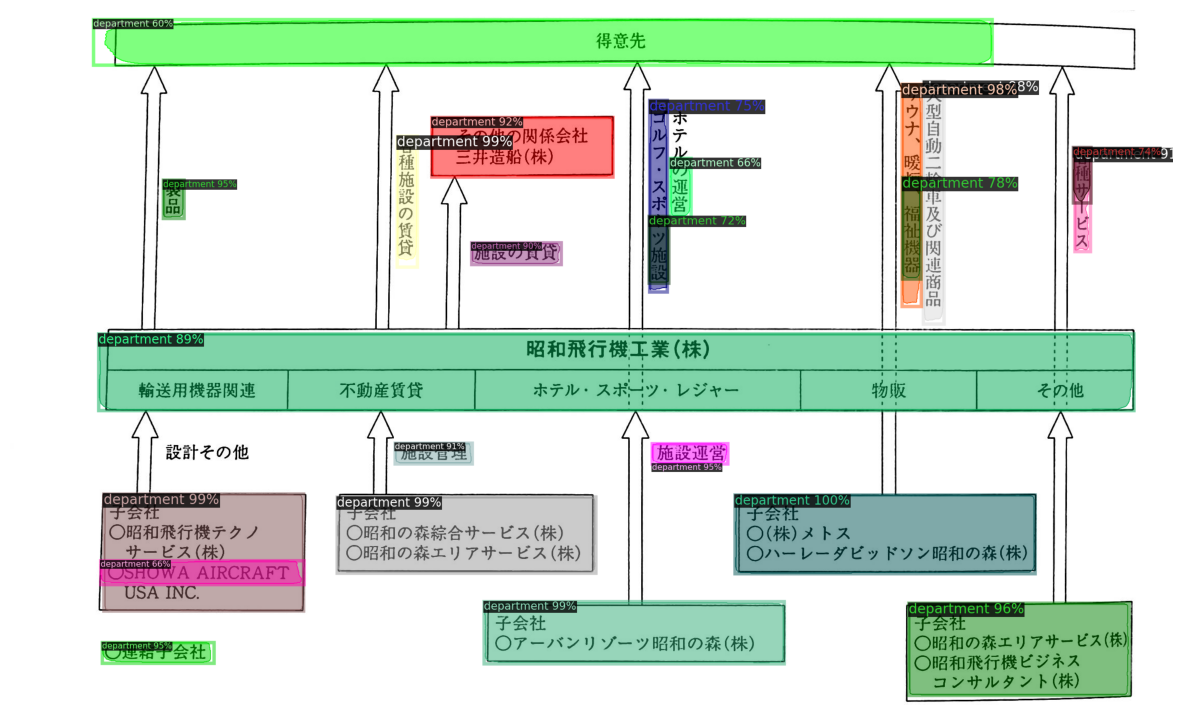

In [ ]:
from detectron2.utils.visualizer import Visualizer, ColorMode
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog

def get_test_dicts(img_dir):
    img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.jpg') or f.endswith('.png')]
    dataset_dicts = []
    for idx, img_file in enumerate(img_files):
        record = {}
        record["file_name"] = img_file
        record["image_id"] = idx
        record["height"], record["width"] = cv2.imread(img_file).shape[:2]
        dataset_dicts.append(record)
    return dataset_dicts

DatasetCatalog.register("org_chart_test", lambda: get_test_dicts(path_test))
MetadataCatalog.get("org_chart_test").set(thing_classes=["department"])

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # 学習済みモデルの重みをロード
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # 信頼度の閾値を設定
cfg.DATASETS.TEST = ("org_chart_test", )  # テストデータセットを指定
predictor = DefaultPredictor(cfg)

# テストデータセットのメタデータを取得
metadata = MetadataCatalog.get("org_chart_test")

# テストデータセットのディクショナリを取得
dataset_dicts = DatasetCatalog.get("org_chart_test")

for d in dataset_dicts:
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)

    v = Visualizer(img[:, :, ::-1],
                   metadata=metadata,
                   scale=1.0,
                   instance_mode=ColorMode.IMAGE)  # インスタンスモードを設定
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(15, 15))
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.axis('off')
    plt.show()


In [ ]:
import torch
# 予測を取得
outputs = predictor(img)

# インスタンスを取得
instances = outputs["instances"].to("cpu")

# セグメンテーションマスクを取得（[N, H, W] のテンソル）
masks = instances.pred_masks

# 全てのマスクを結合
combined_mask = torch.any(masks, dim=0).numpy()

plt.figure(figsize=(8, 8))
plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('off')
plt.show()

